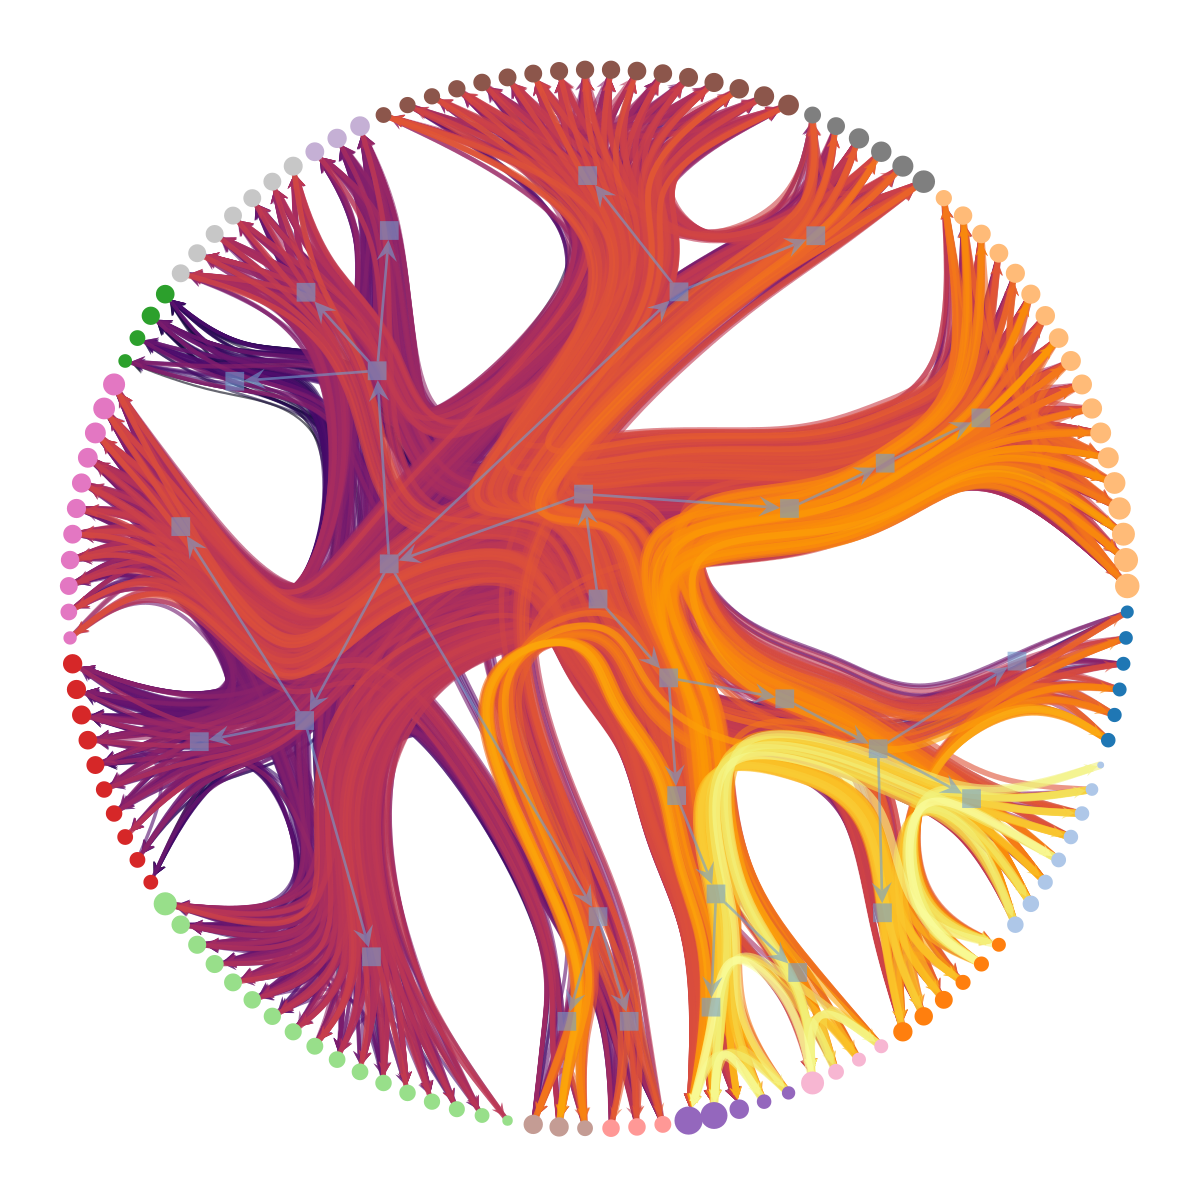

In [1]:
import graph_tool.all as gt
import matplotlib.cm

gt.seed_rng(47)

g = gt.collection.ns["foodweb_baywet"]

sargs = dict(recs=[g.ep.weight],
             rec_types=["real-exponential"])
state = \
    gt.minimize_nested_blockmodel_dl(g,
                                     state_args=sargs)

state.draw(edge_color=gt.prop_to_size(g.ep.weight,
                                      power=1,
                                      log=True),
           ecmap=(matplotlib.cm.inferno, .6),
           eorder=g.ep.weight,
           edge_pen_width=gt.prop_to_size(g.ep.weight,
                                          1, 4,
                                          power=1,
                                          log=True),
           edge_gradient=[]);

In [2]:
for v in g.vertices():
    print(v)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


In [ ]:
import pandas as pd
from graph_tool.all import *
from collections import defaultdict
import numpy as np
import matplotlib as plt


location = "/mnt/c/Users/sauba/Desktop/Drosophila_BUSCO_ERC/4.BUSCO_filtered/7.ERC"

# erc_dataset = pd.read_parquet(f"{location}/ERC_correlation_longform_annotated.parquet")
file_name = "ERC_correlation_longform_annotated_sbm"

df = pd.read_parquet(f"{location}/ERC_correlation_longform_annotated.parquet")


df.rename(columns={'value': 'Correlation'}, inplace=True)
# df = df[(df['Correlation'] > 0.4) & (df['Correlation'] < 1.0)]
# df = df[df['Correlation'] < 1.0]

g = Graph(directed=False)

name_prop = g.new_vertex_property("string")
weight = g.new_edge_property("float")
pen_width = g.new_edge_property("float")
edge_label = g.new_edge_property("string")

vsize = g.new_vertex_property("float")
vsize.a = 1

min_w, max_w = 1.0, 5.0
min_corr = 0.4
max_corr = 0.99


node_map = {}
def get_vertex(name):
    if name not in node_map:
        v = g.add_vertex()
        node_map[name] = v
        name_prop[v] = name
    return node_map[name]

added_edges = set()

for _, row in df.iterrows():
    
    source = row['Annotation_gene1']
    target = row['Annotation_gene2']

    if type(source)== float:
       source = "nan" 
    if type(target)== float:
       target = "nan" 
    if source is None:
       source = "non" 
    if target is None:
       target = "non" 
    
    try:
        key = tuple(sorted([source, target]))
    except:
        print(source,target, row)
        assert False

    if key in added_edges:
        continue
    added_edges.add(key)
    v1 = get_vertex(source)
    v2 = get_vertex(target)
    
    # if row["Correlation"] > 0.4 and row["Correlation"] < 1.0:
    if row["Correlation"] < 1.0:
        corr = row["Correlation"]
        e = g.add_edge(v1, v2)
        weight[e] = corr
        scaled = min_w + (corr - min_corr) / (max_corr - min_corr) * (max_w - min_w)
        pen_width[e] = scaled
        edge_label[e] = f"{corr:.2f}"

deg = g.degree_property_map("total")
max_deg = max(deg.a) if max(deg.a) > 0 else 1
color = g.new_vertex_property("vector<float>")        


cmap = plt.colormaps['Spectral_r']
list_of_degree = []
degree_list_plus = []
for v in g.vertices():
    d = deg[v]
    list_of_degree.append(d)
    degree_list_plus.append((name_prop[v],d))
    # Normalize degree to be between 0 and 1 for colormap mapping
    log_deg = np.log1p(d) # log1p(x) is log(1+x)
    max_log_deg = np.log1p(max_deg)
    normalized_degree = log_deg / max_log_deg if max_log_deg > 0 else 0
    # normalized_degree = d / max_deg if max_deg > 0 else 0
    
    # Get RGBA color from the colormap
    rgba_color = cmap(normalized_degree)
    color[v] = rgba_color # Assign the RGBA tuple directly

g.vp.name = name_prop
g.vp.vsize = vsize
g.vp.color = color          # Optional, if used later
g.ep.weight = weight        # 🔴 KEY FIX
g.ep.pen_width = pen_width
g.ep.edge_label = edge_label

sargs = dict(recs=[g.ep.weight],
             rec_types=["real-exponential"])
state = \
    gt.minimize_nested_blockmodel_dl(g,
                                     state_args=sargs)

state.draw(edge_color=gt.prop_to_size(g.ep.weight,
                                      power=1,
                                      log=True),
           ecmap=(matplotlib.cm.inferno, .6),
           eorder=g.ep.weight,
           edge_pen_width=gt.prop_to_size(g.ep.weight,
                                          1, 4,
                                          power=1,
                                          log=True),
           edge_gradient=[]);



In [2]:
print(type(target))

<class 'NoneType'>


In [6]:
print(target is None)

True
